# Dimensionality Reduction

In [1]:
# Common imports
import numpy as np
import pandas as pd

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

Build a 3D dataset:

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### PCA using SVD decomoposition

In [3]:
X_centered = X - X.mean(axis=0)
X_centered

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

> PCA assumes that the dataset is centered around the origin.

Use the `np.svd()` func to obtain all the principal components of the training set:

In [4]:
U, s, Vt = np.linalg.svd(X_centered)

In [5]:
Vt

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

Extracts the first two PCs (PC: principal component):

In [6]:
Vt.T

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [7]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
c1
c2

array([0.93636116, 0.29854881, 0.18465208])

array([-0.34027485,  0.90119108,  0.2684542 ])

To **project the training set onto the hyperplane**, compute the dot product of the training set matrix $X$ by the matrix $W_d$, defined as the matrix containing the first $d$ principal components (i.e., the matrix composed of the first $d$ columns of `Vt.T`).

In [10]:
W2 = Vt.T[:, :2]

In [11]:
X2D_using_svd = X_centered.dot(W2)
X2D_using_svd

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

### PCA using skl

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D_using_skl = pca.fit_transform(X)
X2D_using_skl

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

> Notice that **running PCA multiple times on slightly different datasets may result in different results**. In general **the only difference is that some axes may be flipped (翻转，倒转)**. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [13]:
np.allclose(X2D_using_svd, -X2D_using_skl)

True

Recover the 3D points projected on the plane (PCA 2D subspace):

In [14]:
# Transform data (X2D_using_skl) back to its original space (X).
X3D_inv = pca.inverse_transform(X2D_using_skl)

> There was **some loss of info during the projection step**, so the recovered 3D points (`X3D_inv`) are not exactly equal to the original 3D points (`X`).

In [15]:
np.allclose(X, X3D_inv)

False

Compute the reconstruction error:

In [16]:
# np.square: Return the element-wise square of the input.
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The inverse transform in the SVD approach looks like this:

In [17]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The constructions form both methods are not identical because skl's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [18]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

**Access to the pricipal components:**

In [19]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [20]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [21]:
Vt.T[:, :2]  # the columns

array([[ 0.93636116, -0.34027485],
       [ 0.29854881,  0.90119108],
       [ 0.18465208,  0.2684542 ]])

> Notice how the axes are flipped.

### Explained Variance ratio

In [22]:
# The amount of variance explained by each of the selected components.
pca.explained_variance_

array([0.77830975, 0.1351726 ])

In [23]:
# Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

> The first dimension explains 84.2% of the variance, while the second explains 14.6%.

By projecting down to 2D, we lost 1.1% of the variance:

In [24]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

Compute the explained variance ratio using the SVD approach:

In [25]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

### Choosing the Right Number of Dimensions

It is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).

+ option 1

```python
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
```
then set `n_components=d` and run PCA again:
```python
pca = PCA(n_components=d)
pca.fit(X)
```

+ option 2

Set `n_components` to be a float between 0.0 and 1.0, indicating the ratio of variance u wish to preserve:

```python
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
```

### PCA for Compression (MNIST Compression)

In [26]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata("MNIST original")
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

Choose the number of dimensions that add up to 95% of its variance:

In [27]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

154

In [28]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [29]:
pca.n_components_

154

In [30]:
np.sum(pca.explained_variance_ratio_)

0.9504463030200185

Reconstruct data (X_train)(compressed and then decompressed):

In [31]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")

<Figure size 504x288 with 0 Axes>

Text(0.5,1,'Original')

Text(0.5,1,'Compressed')

Text(0.5,0.98,'MNIST compression prserving 95% of the variance using PCA')

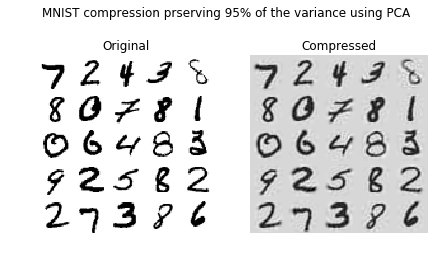

In [33]:
plt.figure(figsize=(7, 4))

plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=12)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=12)

plt.suptitle("MNIST compression prserving 95% of the variance using PCA", fontsize=12)
plt.show()

In [34]:
X_reduced_pca = X_reduced

### Incremental PCA

+ **Using `IncrementalPCA`'s `partial_fit()` method on chunks of data fetched sequentially from the local hard drive or a network datanbase.**

In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [36]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [37]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

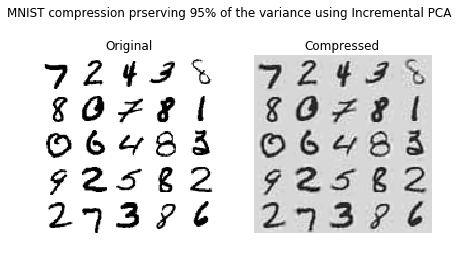

In [38]:
plt.figure(figsize=(7, 4))

plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=12)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=12)

plt.suptitle("MNIST compression prserving 95% of the variance using Incremental PCA", fontsize=12)
plt.show()

In [39]:
X_reduced_inc_pca = X_reduced

Compares the result of transforming MNIST using regular PCA and incremental PCA:

In [40]:
np.allclose(pca.mean_, inc_pca.mean_)

True

> The means are equal.

In [41]:
np.allclose(X_reduced_pca,  X_reduced_inc_pca)

False

> The results are not identical. Incremental PCA gives a very good approximate solution.

+ **Calling `IncrementalPCA`'s `fit()` method on a memory mapped file using `np.memmap`.**

Create the `memmap()` structure and copy the MNIST data into it. This would typically be done by a first program.

In [42]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype="float32", mode="write", shape=(m, n))
X_mm[:] = X_train

Deleting the `memmap()` object will trigger its Python finalizer, which ensures that the data is saved to disk:

In [43]:
del X_mm

Now, another program would load the data and use it for training:

In [44]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

### Randomized PCA

This is a stochastic algorithm that quickly finds an approximation of the first $d$ principal components. It is dramatically faster that the previous algorithms when $d$ is much smaller than $m$.

In [45]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Time Complexity

Time **regular PCA** against **IncrementalPCA** and **RandomizedPCA**, for various number of principal components:

In [46]:
import time

for n_components in (2, 10, 154):
    print("n_components = ", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, svd_solver="randomized",
                  random_state=42)
    
    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}:{:.1f} seconds".format(pca.__class__.__name__, t2-t1))

n_components =  2
    PCA:1.7 seconds
    IncrementalPCA:9.7 seconds
    PCA:1.7 seconds
n_components =  10
    PCA:2.0 seconds
    IncrementalPCA:10.2 seconds
    PCA:1.9 seconds
n_components =  154
    PCA:5.0 seconds
    IncrementalPCA:13.6 seconds
    PCA:4.8 seconds


Compare **PCA** and **Randomized PCA** for **datasets of different size** (number of instances):

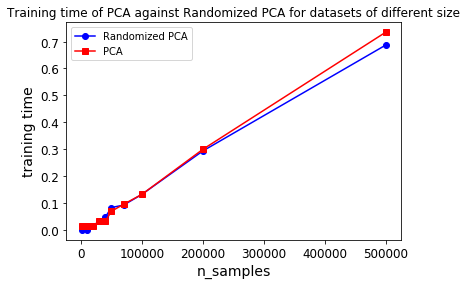

In [47]:
time_rpca = []
time_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    rnd_pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    rnd_pca.fit(X)
    t2 = time.time()
    time_rpca.append(t2-t1)
    
    pca = PCA(n_components=2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    time_pca.append(t2-t1)

plt.plot(sizes, time_rpca, "b-o", label="Randomized PCA")
plt.plot(sizes, time_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("training time")
plt.legend(loc="best")
plt.title("Training time of PCA against Randomized PCA for datasets of different size")
plt.show()

Compare their (regular PCA and Randomized PCA) performance on datasets of 2000 instances with various numbers of features:

Text(0.5,1,'PCA and Randomized PCA time complexity ')

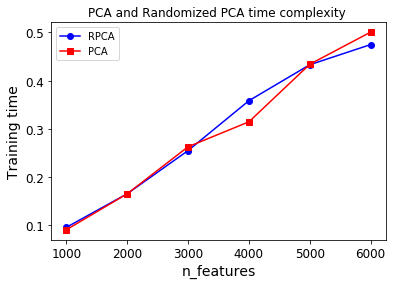

In [48]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

### Kernel PCA

In [49]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Utility class to draw 3D arrows:

In [50]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

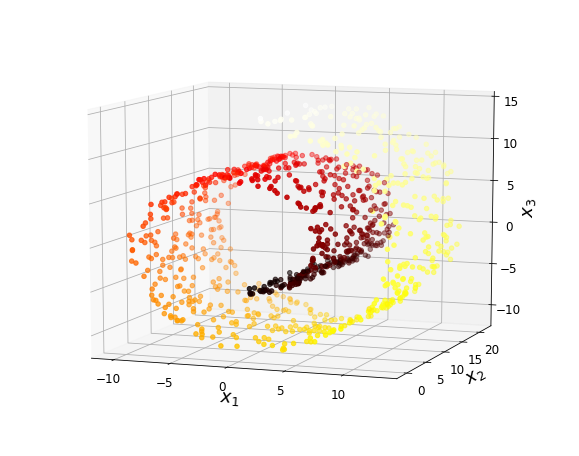

In [51]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

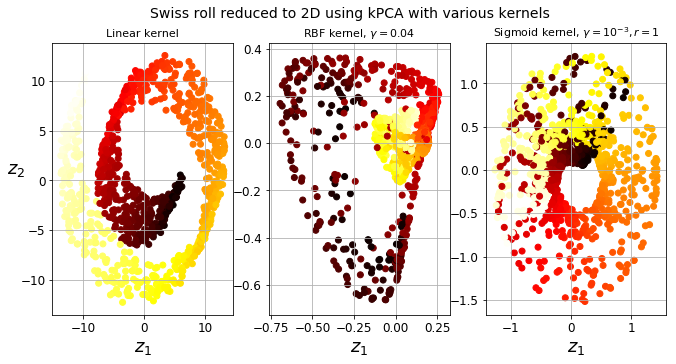

In [52]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear",
                    fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf",
                    gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid",
                    gamma=0.1, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 5))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=11)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.suptitle("Swiss roll reduced to 2D using kPCA with various kernels", fontsize=14)
plt.show()

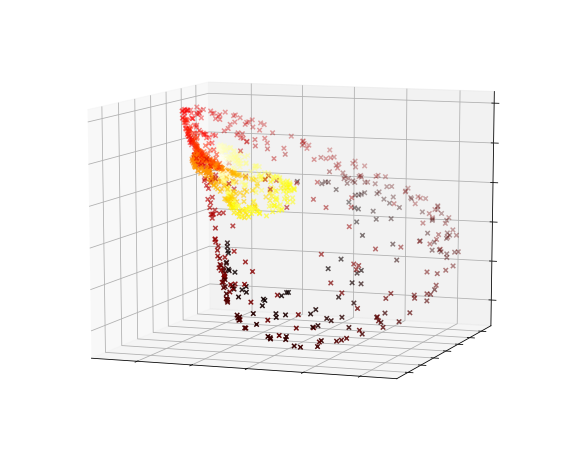

In [53]:
plt.figure(figsize=(10, 8))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

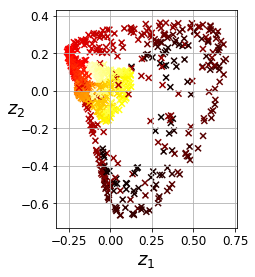

In [54]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

### Selecting a Kernel and Tuning Hypermarameters

+ Use grid search to select the kernel and hyperparameters that lead to the best performance on the supervised learning task.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
    ])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

+ Another approach is to select the kernel and hyperparameters that yields the lowest reconstruction errors.

In [57]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [58]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766075

### LLE

In [59]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

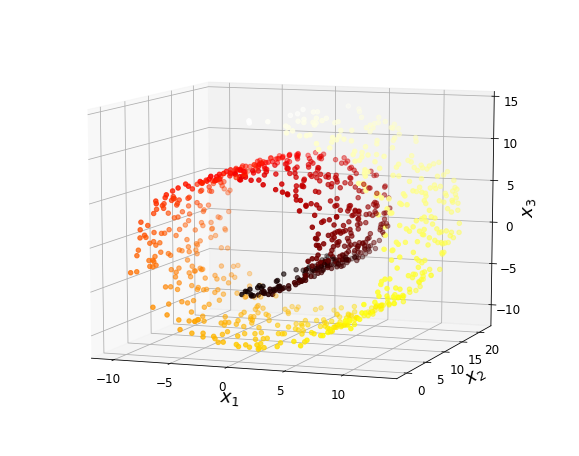

In [60]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [61]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

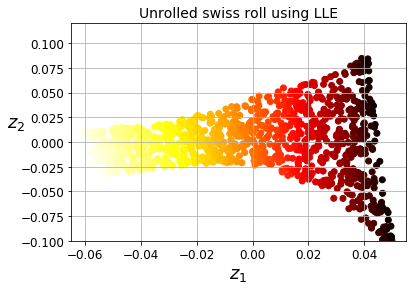

In [62]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.show()

### MDS, Isomap and t-SNE

In [63]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42, n_jobs=-1)
X_reduced_mds = mds.fit_transform(X)

In [64]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

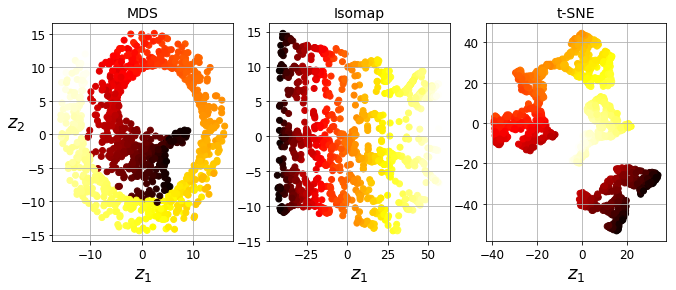

In [66]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles, (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()